In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
df = pd.read_csv("data/Sales analysis.csv")
df.head()

,OrderID,Product,Category,Quantity,Price,Region
0,1,Laptop,Electronics,1.0,60000,North
1,2,Phone,Electronics,2.0,20000,South
2,3,Laptop,Electronics,1.0,65000,East
3,4,Tablet,Electronics,3.0,15000,West
4,5,Phone,Electronics,2.0,22000,North


In [3]:
# ----------------------------------- 3) Data Cleaning ----------------------------------

# Check null values
print("Missing Values:\n", df.isnull().sum())

# Check duplicates
duplicate = df.duplicated().sum()
print("Total Duplicates:", duplicate)

# Handle missing values
df["Quantity"] = df["Quantity"].fillna(0)
df["Category"] = df["Category"].fillna("Electronics")

# Remove extra spaces
df["Product"] = df["Product"].str.strip()
df["Region"] = df["Region"].str.strip()

df.head()


Missing Values:
 OrderID     0
Product     0
Category    1
Quantity    1
Price       0
Region      0
dtype: int64
Total Duplicates: 0


,OrderID,Product,Category,Quantity,Price,Region
0,1,Laptop,Electronics,1.0,60000,North
1,2,Phone,Electronics,2.0,20000,South
2,3,Laptop,Electronics,1.0,65000,East
3,4,Tablet,Electronics,3.0,15000,West
4,5,Phone,Electronics,2.0,22000,North


In [4]:
# ----------------------------------- 4) Basic EDA ----------------------------------

# Total Revenue
df["Revenue"] = df["Quantity"] * df["Price"]
print("💰 Total Revenue:", df["Revenue"].sum())

# Top sales product (by quantity)
print("\n📌 Top Sales Product (Quantity):\n", 
      df.groupby("Product")["Quantity"].sum().sort_values(ascending=False).head(1))

# Region with highest sales (by revenue)
print("\n🌍 Region with Highest Revenue:\n", 
      df.groupby("Region")["Revenue"].sum().sort_values(ascending=False).head(1))


💰 Total Revenue: 424000.0

📌 Top Sales Product (Quantity):
 Product
Tablet    7.0
Name: Quantity, dtype: float64

🌍 Region with Highest Revenue:
 Region
East    125000.0
Name: Revenue, dtype: float64


C:\Users\Neeraj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128185 (\N{CHART WITH UPWARDS TREND AND YEN SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


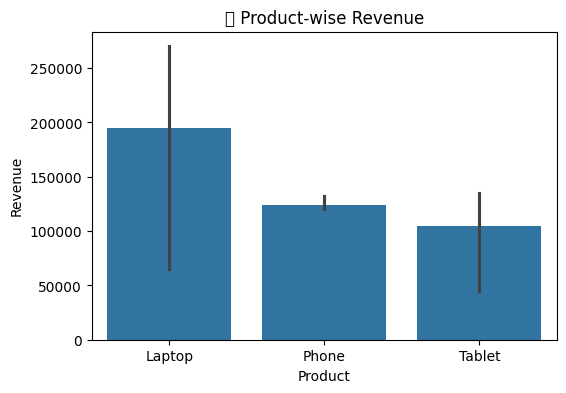

C:\Users\Neeraj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


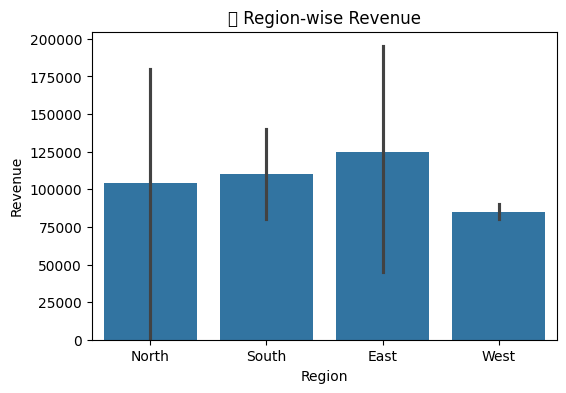

C:\Users\Neeraj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


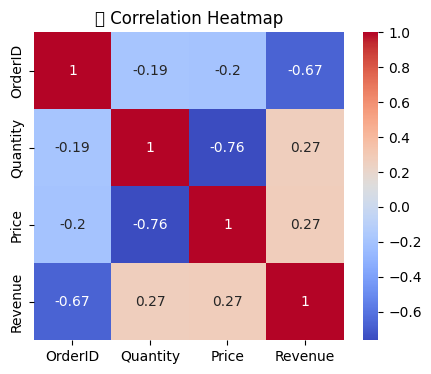

In [5]:
# ----------------------------------- 5) Visualizations ----------------------------------

# Product-wise Sales
plt.figure(figsize=(6,4))
sns.barplot(x="Product", y="Revenue", data=df, estimator=sum)
plt.title("💹 Product-wise Revenue")
plt.show()

# Region-wise Sales
plt.figure(figsize=(6,4))
sns.barplot(x="Region", y="Revenue", data=df, estimator=sum)
plt.title("🌍 Region-wise Revenue")
plt.show()

# Heatmap (Correlation)
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("📈 Correlation Heatmap")
plt.show()


Total Revenue: 424000.0
Top Product (Revenue):
 Product
Laptop    195000.0
Name: Revenue, dtype: float64


C:\Users\Neeraj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128185 (\N{CHART WITH UPWARDS TREND AND YEN SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


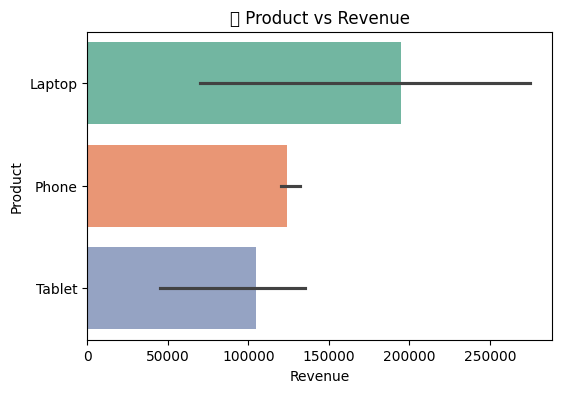

C:\Users\Neeraj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


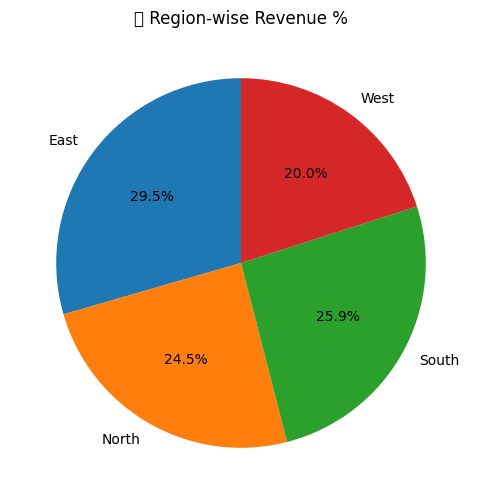

In [8]:
# ----------------------------------- 6) Advanced Analysis (Practice Task 🚀) ----------------------------------

# Total Revenue
print("Total Revenue:", df["Revenue"].sum())

# Top product by revenue
print("Top Product (Revenue):\n", df.groupby("Product")["Revenue"].sum().sort_values(ascending=False).head(1))

# Product vs Revenue
plt.figure(figsize=(6,4))
sns.barplot(x="Revenue", y="Product", data=df, estimator=sum, hue="Product", palette="Set2")
plt.title("💹 Product vs Revenue")
plt.show()

# Region-wise Revenue % (Pie chart)
region_sales = df.groupby("Region")["Revenue"].sum()
plt.figure(figsize=(6,6))
plt.pie(region_sales, labels=region_sales.index, autopct="%1.1f%%", startangle=90)
plt.title("🌍 Region-wise Revenue %")
plt.show()
